# 0. IMPORTS

## 0.1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import inflection

## 0.2. Loading data

In [2]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
df = pd.read_json(url)

## 0.3. Dicionário de dados

Nome | Descrição
--|--
customerID | número de identificação único de cada cliente
Churn | se o cliente deixou ou não a empresa 
gender | gênero (masculino e feminino) 
SeniorCitizen | informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
Partner |  se o cliente possui ou não um parceiro ou parceira
Dependents | se o cliente possui ou não dependentes
tenure |  meses de contrato do cliente
PhoneService | assinatura de serviço telefônico 
MultipleLines | assisnatura de mais de uma linha de telefone 
InternetService | assinatura de um provedor internet 
OnlineSecurity | assinatura adicional de segurança online 
OnlineBackup | assinatura adicional de backup online 
DeviceProtection | assinatura adicional de proteção no dispositivo 
TechSupport | assinatura adicional de suporte técnico, menos tempo de espera
StreamingTV | assinatura de TV a cabo 
StreamingMovies | assinatura de streaming de filmes 
Contract | tipo de contrato
PaperlessBilling | se o cliente prefere receber online a fatura
PaymentMethod | forma de pagamento
Charges.Monthly | total de todos os serviços do cliente por mês
Charges.Total | total gasto pelo cliente

## 0.3. Helper functions

In [3]:
def rename_columns(cols):
    cols = list(map(lambda x: inflection.titleize(x), cols))
    cols = list(map(lambda x: x.replace(" ", ""), cols))
    cols = list(map(lambda x: x.replace(".", ""), cols))
    cols = list(map(lambda x: inflection.underscore(x), cols))
    return cols

def fill_nas(df, col, text):
    df_aux = df[col]. map({'Yes': 'Yes', 'No': 'No', text: 'No'})
    return df_aux

def convert_and_replace(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return 0.0
  
def grafics_num_attribute(df, col):
    # Calcular a média e a mediana
    mean_value = np.mean(df[col])
    median_value = np.median(df[col])
    std_low = mean_value - np.std(df[col])
    std_high = mean_value + np.std(df[col])

    # Criação dos subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plotagem do histograma no primeiro subplot
    ax1.hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='gray')
    ax1.axvline(mean_value, color='red', linewidth=2, label='Média')
    ax1.axvline(median_value, color='blue', linewidth=2, label='Mediana')
    ax1.axvline(std_low, color='red', linestyle='dashed', linewidth=2, label='Low std')
    ax1.axvline(std_high, color='red', linestyle='dashed', linewidth=2, label='High std')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequência')
    ax1.set_title(f'Histograma de {col} com Média e Mediana')
    ax1.legend()

    # Plotagem do boxplot no segundo subplot
    ax2.boxplot(df[col], vert=False, medianprops={'color': 'blue', 'linewidth': 2})
    ax2.set_xlabel(col)
    ax2.set_title(f'Boxplot de {col}')

    # Ajustar espaçamento entre os subplots
    plt.tight_layout()

    # Exibir os subplots
    plt.show()


# 1. PASSO 01 - DATA DESCRIPTION

In [4]:
df1 = df.copy()

## 1.1. Normalize Columns

In [5]:
# Normalizar colunas com dicionários aninhados
columns_to_normalize = ['customer', 'phone', 'internet', 'account']
for col in columns_to_normalize:
    df1 = pd.concat([df1.drop([col], axis=1), pd.json_normalize(df1[col])], axis=1)
df1.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.2. Rename Columns

In [6]:
df1.columns = rename_columns(df1.columns)
df1.head()

,customer,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 1.3. Data Dimensions

In [7]:
print('Quantidade de linha: {:,}'.format(df1.shape[0]))
print('Quantidade de colunas: {:,}'.format(df1.shape[1]))

Quantidade de linha: 7,267
Quantidade de colunas: 21


## 1.4. Data Types

In [8]:
df1.dtypes

customer              object
churn                 object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
charges_monthly      float64
charges_total         object
dtype: object

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7267 non-null   object 
 1   churn              7267 non-null   object 
 2   gender             7267 non-null   object 
 3   senior_citizen     7267 non-null   int64  
 4   partner            7267 non-null   object 
 5   dependents         7267 non-null   object 
 6   tenure             7267 non-null   int64  
 7   phone_service      7267 non-null   object 
 8   multiple_lines     7267 non-null   object 
 9   internet_service   7267 non-null   object 
 10  online_security    7267 non-null   object 
 11  online_backup      7267 non-null   object 
 12  device_protection  7267 non-null   object 
 13  tech_support       7267 non-null   object 
 14  streaming_tv       7267 non-null   object 
 15  streaming_movies   7267 non-null   object 
 16  contract           7267 

## 1.5. Check NA's

In [10]:
df1.isna().sum()

customer             0
churn                0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
charges_monthly      0
charges_total        0
dtype: int64

In [11]:
# Não foi possível trocar o tipo para float pq existem linhas ''
# df1['charges_total'].astype(float)

In [12]:
# Nota-se que existem Na's na terceira opção de algumas features de 'Yes' ou 'No' e charges_total que possui ''
unicos = pd.DataFrame(df1.nunique())
unicos.columns= ['count']
unicos['content'] = df1.apply(lambda x: x.unique())
unicos

,count,content
customer,7267,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,3,"[No, Yes, ]"
gender,2,"[Female, Male]"
senior_citizen,2,"[0, 1]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
tenure,73,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_service,2,"[Yes, No]"
multiple_lines,3,"[No, Yes, No phone service]"
internet_service,3,"[DSL, Fiber optic, No]"


In [13]:
# df2['payment_method'] = df2['payment_method'].apply(lambda x: x.replace(' (automatic)', ''))
# df2['payment_method'].unique()

In [14]:
# Avaliar % de dados vazios para analisar a possibilidade de deletá-los
churn_vazios = df1['churn'].value_counts().to_frame()
churn_vazios.columns = ['count']
churn_vazios['%'] = round(df1['churn'].value_counts(normalize=True).sort_values() * 100, 2)
churn_vazios

,count,%
No,5174,71.20
Yes,1869,25.72
,224,3.08


## 1.6. Tratamento de dados

In [15]:
df2 = df1.copy()

### 1.6.1. Substituir a terceira opção por 'No'

In [16]:
df2['multiple_lines']    = fill_nas(df2, 'multiple_lines', 'No phone service')
df2['online_security']   = fill_nas(df2, 'online_security', 'No internet service')
df2['online_backup']     = fill_nas(df2, 'online_backup', 'No internet service')
df2['device_protection'] = fill_nas(df2, 'device_protection', 'No internet service')
df2['tech_support']      = fill_nas(df2, 'tech_support', 'No internet service')
df2['streaming_tv']      = fill_nas(df2, 'streaming_tv', 'No internet service')
df2['streaming_movies']  = fill_nas(df2, 'streaming_movies', 'No internet service')

In [17]:
unicos = pd.DataFrame(df2.nunique())
unicos.columns= ['count']
unicos['content'] = df2.apply(lambda x: x.unique())
unicos

,count,content
customer,7267,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
churn,3,"[No, Yes, ]"
gender,2,"[Female, Male]"
senior_citizen,2,"[0, 1]"
partner,2,"[Yes, No]"
dependents,2,"[Yes, No]"
tenure,73,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone_service,2,"[Yes, No]"
multiple_lines,2,"[No, Yes]"
internet_service,3,"[DSL, Fiber optic, No]"


### 1.6.2. Remover linhas com churn vazio

In [18]:
churn_vazio = df2.query('churn == ""').index
df2.drop(churn_vazio, axis=0, inplace=True)

In [19]:
df2 = df2.reset_index(drop=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7043 non-null   object 
 1   churn              7043 non-null   object 
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

## 1.7. Change Data Types

### 1.7.1. Alterar 

In [20]:
# df2['charges_total'].astype(np.float64)

In [21]:
df2.loc[df2['charges_total'] == ' ', ['contract', 'charges_monthly', 'charges_total']]

,contract,charges_monthly,charges_total
945,Two year,56.05,
1731,Two year,20.00,
1906,Two year,61.90,
2025,One year,19.70,
2176,Two year,20.25,
2250,Two year,25.35,
2855,Two year,73.35,
3052,Two year,25.75,
3118,Two year,52.55,
4054,Two year,80.85,


In [22]:
idx1 = df2.loc[(df2['charges_total'] == ' ') & (df2['contract'] == 'One year'), ['contract', 'charges_monthly', 'charges_total']].index
idx2 = df2.loc[(df2['charges_total'] == ' ') & (df2['contract'] == 'Two year'), ['contract', 'charges_monthly', 'charges_total']].index

In [23]:
df2.loc[idx1, 'charges_total'] = df2['charges_monthly'] * 12
df2.loc[idx2, 'charges_total'] = df2['charges_monthly'] * 24

In [24]:
df2.loc[idx1, ['contract', 'charges_monthly', 'charges_total']]

,contract,charges_monthly,charges_total
2025,One year,19.7,236.4


In [25]:
df2.loc[idx2, ['contract', 'charges_monthly', 'charges_total']]

,contract,charges_monthly,charges_total
945,Two year,56.05,1345.2
1731,Two year,20.00,480.0
1906,Two year,61.90,1485.6
2176,Two year,20.25,486.0
2250,Two year,25.35,608.4
2855,Two year,73.35,1760.4
3052,Two year,25.75,618.0
3118,Two year,52.55,1261.2
4054,Two year,80.85,1940.4
5433,Two year,19.85,476.4


In [26]:
df2['charges_total'] = df2['charges_total'].astype(np.float64)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7043 non-null   object 
 1   churn              7043 non-null   object 
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   int64  
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

In [27]:
df2.loc[df2['tenure'] == 0, ['tenure', 'contract', 'charges_monthly', 'charges_total']].index

Int64Index([945, 1731, 1906, 2025, 2176, 2250, 2855, 3052, 3118, 4054, 5433], dtype='int64')

In [28]:
# Converter charges_total para float
#df2['charges_total'] = df2['charges_total'].apply(convert_and_replace)

In [29]:
# Converter senior_citizen em categórico ('Yes', 'No')
df2['senior_citizen'] = df2['senior_citizen'].map({0: 'No', 1: 'Yes'})

In [30]:
# Converter churn em numérico (0, 1)
df2['churn'] = df2['churn'].map({'No': 0, 'Yes': 1})

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           7043 non-null   object 
 1   churn              7043 non-null   int64  
 2   gender             7043 non-null   object 
 3   senior_citizen     7043 non-null   object 
 4   partner            7043 non-null   object 
 5   dependents         7043 non-null   object 
 6   tenure             7043 non-null   int64  
 7   phone_service      7043 non-null   object 
 8   multiple_lines     7043 non-null   object 
 9   internet_service   7043 non-null   object 
 10  online_security    7043 non-null   object 
 11  online_backup      7043 non-null   object 
 12  device_protection  7043 non-null   object 
 13  tech_support       7043 non-null   object 
 14  streaming_tv       7043 non-null   object 
 15  streaming_movies   7043 non-null   object 
 16  contract           7043 

## 1.8. Descriptive Statics

In [32]:
# Separar os tipos de dados categóricos dos numéricos
num = df2.select_dtypes(include = ['int64', 'int32', 'float64'])
cat = df2.select_dtypes(exclude = ['int64', 'int32', 'float64'])

### 1.7.1. Numerical attributes

In [33]:
# Incluir: Range, kurtosis, skew e std 
num_describe = num.describe().T
num_describe['range'] = pd.DataFrame(num.apply(lambda x: x.max() - x.min()))
num_describe['skew'] = pd.DataFrame(num.apply(lambda x: x.skew()))
num_describe['kurtosis'] = pd.DataFrame(num.apply(lambda x: x.kurtosis()))
num_describe

,count,mean,std,min,25%,50%,75%,max,range,skew,kurtosis
churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00,1.0,1.063031,-0.870211
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00,72.0,0.239540,-1.387372
charges_monthly,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75,100.5,-0.220524,-1.257260
charges_total,7043.0,2281.253259,2265.703526,18.80,401.9,1396.25,3786.60,8684.80,8666.0,0.963745,-0.227068


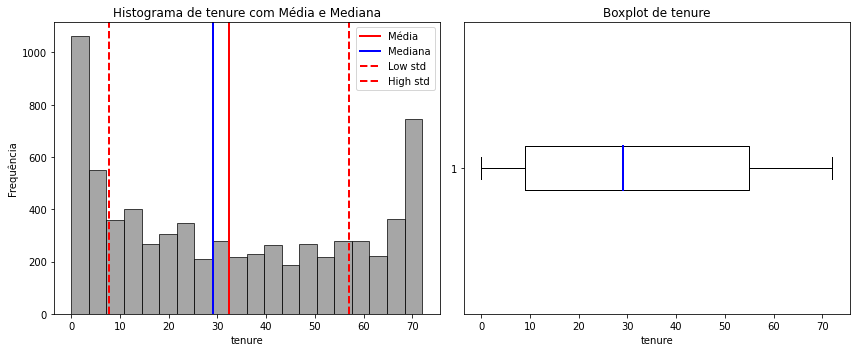

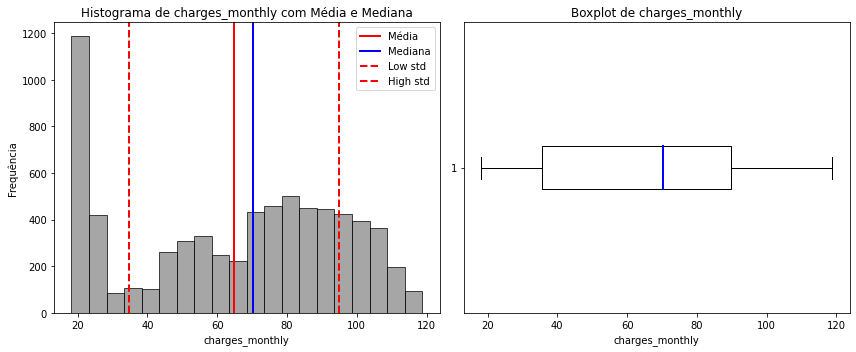

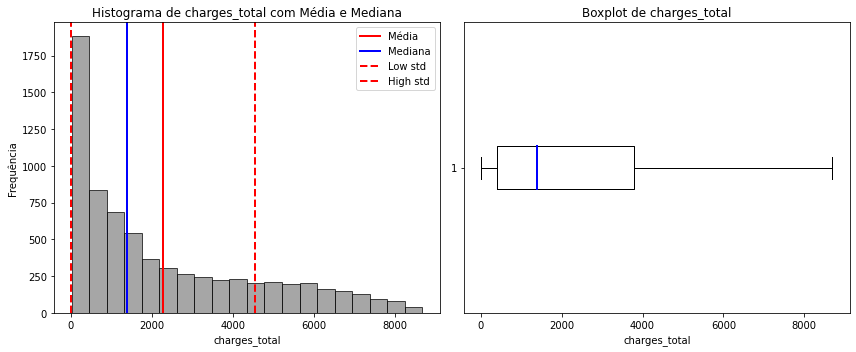

In [34]:
# Chamar a função para cada atributo
for col in ['tenure', 'charges_monthly', 'charges_total']:
    grafics_num_attribute(num, col)

### 1.7.2. Categorical attributes

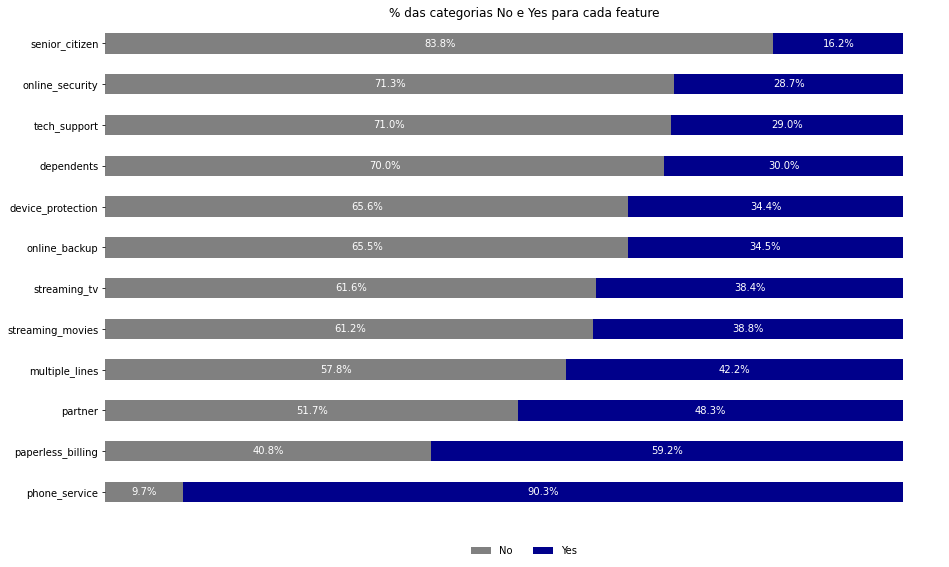

In [35]:
# Constroi tabela com % de cada categoria
def make_table_yes_no(df, col):
    table_yes_no[col] = df[col].value_counts(normalize=True) * 100
    return table_yes_no

# Colunas com categorias 'Yes' e 'No'
list_yes_no = ['partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 
'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

table_yes_no = df2['senior_citizen'].value_counts(normalize=True).to_frame() * 100
for col in list_yes_no:
    table_yes_no = make_table_yes_no(cat, col)
    
table_yes_no = table_yes_no.T
table_yes_no_sorted = table_yes_no.sort_values(by='Yes', ascending=False)

# create stacked bar chart
ax = table_yes_no_sorted.plot(kind='barh', stacked=True, figsize=(15, 9), color=['gray', 'darkblue'], xticks=[])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
    
# Adicionar os valores dentro das barras
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.1f}%' if (w := v.get_width()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
    
# Title and Labels
plt.title('% das categorias No e Yes para cada feature');

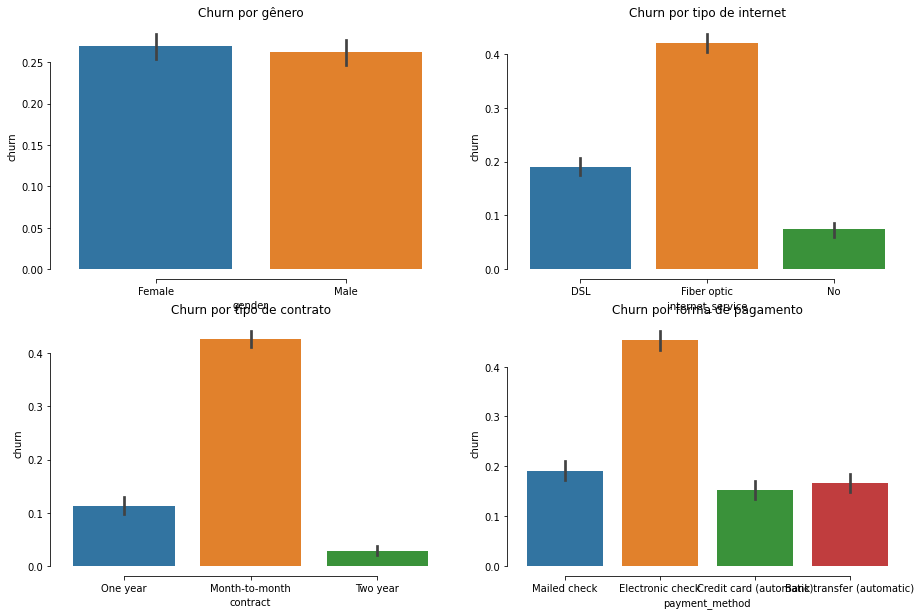

In [36]:
# Gráfico de barras
plt.figure(figsize=(15,10))
plt.subplot( 2, 2, 1 )
sns.barplot( x='gender', y='churn', data=df2)
sns.despine(offset = 10, trim = True)
plt.title('Churn por gênero')

plt.subplot( 2, 2, 2 )
sns.barplot( x='internet_service', y='churn', data=df2 )
sns.despine(offset = 10, trim = True)
plt.title('Churn por tipo de internet')

plt.subplot( 2, 2, 3 )
sns.barplot( x='contract', y='churn', data=df2 )
sns.despine(offset = 10, trim = True)
plt.title('Churn por tipo de contrato')

plt.subplot( 2, 2, 4 )
sns.barplot( x='payment_method', y='churn', data=df2 )
sns.despine(offset = 10, trim = True)
plt.title('Churn por forma de pagamento');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


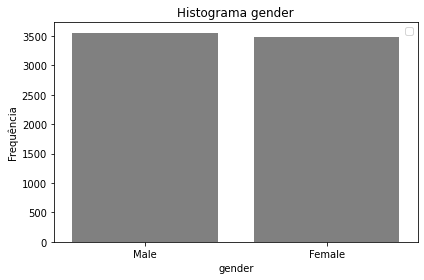

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


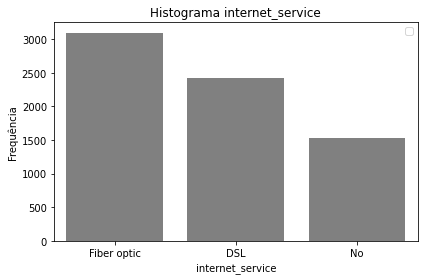

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


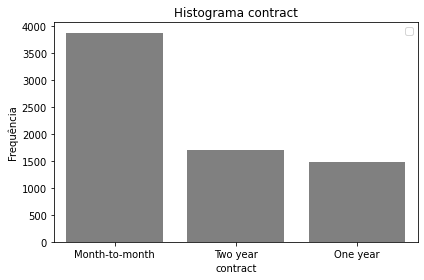

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


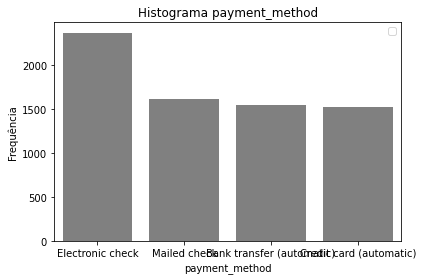

In [37]:
def grafics_cat_attribute(df, col):
    # Criar tabela de frequência por categoria
    df_aux = df[col].value_counts().reset_index()
    df_aux
    
    # Criação dos subplots
    ax1 = sns.barplot(x='index', y=col, data=df_aux)
#    ax = table_yes_no_sorted.plot(kind='barh', stacked=True, figsize=(15, 9), color=['gray', 'darkblue'], xticks=[])

#    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plotagem do histograma no primeiro subplot
    sns.barplot(x='index', y=col, data=df_aux, color='gray')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequência')
    ax1.set_title(f'Histograma {col}')
    ax1.legend()

    # Ajustar espaçamento entre os subplots
    plt.tight_layout()

    # Exibir os subplots
    plt.show();
    
# Chamar a função para cada atributo
for col in ['gender', 'internet_service', 'contract', 'payment_method']:
    grafics_cat_attribute(cat, col)

# 2. PASSO 02 - FEATURE ENGINEERING

In [38]:
df3 = df2.copy()

## 2.1. Mapa Mental de Hipóteses

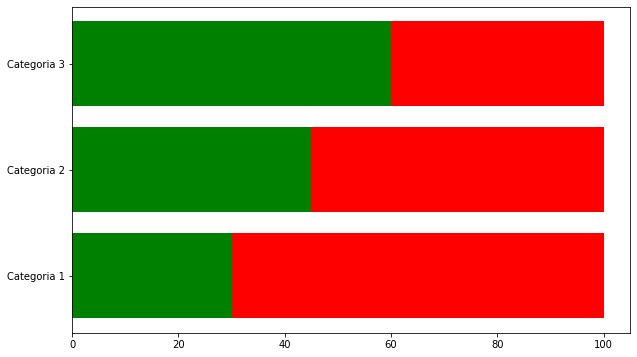

In [42]:
import matplotlib.pyplot as plt

# Dados de exemplo
categorias = ['Categoria 1', 'Categoria 2', 'Categoria 3']
valores_yes = [30, 45, 60]  # Valores para "Yes"
valores_no = [70, 55, 40]   # Valores para "No"

# Crie um gráfico de barras empilhadas horizontal
fig, ax = plt.subplots(figsize=(10, 6))

# Primeira camada (valores "Yes")
ax.barh(categorias, valores_yes, color='green', label='Yes')

# Segunda camada (valores "No")
ax.barh(categorias, valores_no, left=valores_yes, color='red', label='No')

# Configurações do gráfico
#ax.set_xlabel('Valores')
#ax.set_title('Gráfico de Barras Empilhadas Horizontal')
#ax.legend()
#ax.invert_yaxis()  # Inverter o eixo y para a categoria superior aparecer no topo

plt.show()



## 2.4. Feature Engineering

### 2.4.1. Converter

### 2.4.2. Criar